In [1]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
## Source: http://www.ecdms.energy.ca.gov
filename = "MER_T09_08.csv"
filepath = os.path.join("..","data",filename)

prices = pd.read_csv(filepath,index_col=False)
prices.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,ESRCUUS,196013,2.6,1,"Average Retail Price of Electricity, Residential","Cents per Kilowatthour, Including Taxes"
1,ESRCUUS,196113,2.6,1,"Average Retail Price of Electricity, Residential","Cents per Kilowatthour, Including Taxes"
2,ESRCUUS,196213,2.6,1,"Average Retail Price of Electricity, Residential","Cents per Kilowatthour, Including Taxes"
3,ESRCUUS,196313,2.5,1,"Average Retail Price of Electricity, Residential","Cents per Kilowatthour, Including Taxes"
4,ESRCUUS,196413,2.5,1,"Average Retail Price of Electricity, Residential","Cents per Kilowatthour, Including Taxes"


In [3]:
prices.columns

Index(['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'], dtype='object')

In [4]:
prices['Description'].value_counts()

Average Retail Price of Electricity, Total             565
Average Retail Price of Electricity, Commercial        565
Average Retail Price of Electricity, Transportation    565
Average Retail Price of Electricity, Industrial        565
Average Retail Price of Electricity, Residential       565
Average Retail Price of Electricity, Other             565
Name: Description, dtype: int64

In [5]:
prices['Column_Order'].value_counts()

5    565
3    565
1    565
6    565
4    565
2    565
Name: Column_Order, dtype: int64

In [6]:
residential = prices.loc[prices['Description']== "Average Retail Price of Electricity, Residential"]

In [7]:
ByDesc = prices.groupby('Description')

In [8]:
ByDesc['Value'].describe()

,count,unique,top,freq
Description,,,,
"Average Retail Price of Electricity, Commercial",565,272,Not Available,78
"Average Retail Price of Electricity, Industrial",565,232,Not Available,78
"Average Retail Price of Electricity, Other",565,108,Not Applicable,198
"Average Retail Price of Electricity, Residential",565,307,Not Available,78
"Average Retail Price of Electricity, Total",565,267,Not Available,78
"Average Retail Price of Electricity, Transportation",565,146,Not Available,367


In [9]:
residential.columns


Index(['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'], dtype='object')

In [10]:
#### clean up

In [11]:
r = residential.drop(columns=['MSN','Column_Order','Description','Unit'])

In [12]:
r = r.loc[r['Value'] != "Not Available"]
r["dates"] = r['YYYYMM'].astype(str)
#remove rows tha contain 13 in the string
r = r.loc[~r['dates'].str.contains('13')]
r = r.drop(columns=["dates"])
r.head()

,YYYYMM,Value
22,197607,3.9
23,197608,3.7
24,197609,3.8
25,197610,3.9
26,197611,3.8


In [13]:
r.to_csv("../data/monthprices.csv", index=False)

In [17]:
r["date"] = pd.to_datetime(r["YYYYMM"], format="%Y%m")

In [18]:
r.head()

,YYYYMM,Value,date
22,197607,3.9,1976-07-01
23,197608,3.7,1976-08-01
24,197609,3.8,1976-09-01
25,197610,3.9,1976-10-01
26,197611,3.8,1976-11-01


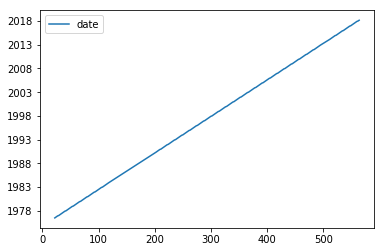

In [49]:
plt.show()


In [51]:
toplt = tosave[["date","Value"]]

In [58]:
toplt.reset_index().drop(columns="index").plot()

In [81]:
dates = tosave["date"].values
values = tosave["Value"].values.astype(float)
plt.plot(x=tosave["date"],y=tosave["Value"])


[]

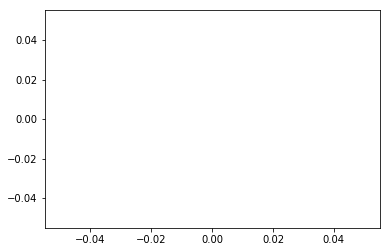

In [82]:
plt.show()

In [83]:
tosave.dtypes


YYYYMM             int64
Value             object
date      datetime64[ns]
dtype: object

In [84]:
values

array([ 3.9 ,  3.7 ,  3.8 ,  3.9 ,  3.8 ,  3.6 ,  3.6 ,  3.7 ,  4.  ,
        4.1 ,  4.2 ,  4.2 ,  4.2 ,  4.4 ,  4.3 ,  4.3 ,  4.2 ,  4.  ,
        3.9 ,  3.9 ,  4.1 ,  4.3 ,  4.5 ,  4.5 ,  4.5 ,  4.5 ,  4.5 ,
        4.5 ,  4.4 ,  4.2 ,  4.1 ,  4.1 ,  4.3 ,  4.5 ,  4.7 ,  4.9 ,
        4.9 ,  4.9 ,  5.  ,  5.  ,  4.8 ,  4.7 ,  4.7 ,  4.7 ,  4.9 ,
        5.1 ,  5.4 ,  5.6 ,  5.7 ,  5.7 ,  5.7 ,  5.7 ,  5.6 ,  5.5 ,
        5.4 ,  5.5 ,  5.8 ,  6.  ,  6.3 ,  6.5 ,  6.6 ,  6.6 ,  6.6 ,
        6.6 ,  6.4 ,  6.3 ,  6.2 ,  6.4 ,  6.6 ,  6.7 ,  6.9 ,  7.1 ,
        7.2 ,  7.2 ,  7.2 ,  7.2 ,  6.9 ,  6.7 ,  6.7 ,  6.7 ,  6.9 ,
        6.9 ,  7.2 ,  7.4 ,  7.5 ,  7.5 ,  7.6 ,  7.5 ,  7.3 ,  7.  ,
        7.17,  7.48,  7.57,  7.69,  7.96,  8.1 ,  8.18,  8.24,  8.15,
        8.04,  7.8 ,  7.61,  7.41,  7.61,  7.79,  7.98,  8.14,  8.32,
        8.38,  8.41,  8.37,  8.32,  7.95,  7.81,  7.7 ,  7.78,  8.01,
        8.03,  8.38,  8.61,  8.54,  8.56,  8.59,  8.44,  8.14,  7.86,
        7.73,  7.79,